# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [18]:
%matplotlib inline

import pickle
from matplotlib import pyplot
import tensorflow as tf
from utils import *
from prep import *
import model

In [19]:
training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'
X_train, y_train, sizes, positions = load_pickled_data(training_file, ['features', 'labels', 'sizes', 'coords'])
X_valid, y_valid, sizes, positions = load_pickled_data(validation_file, ['features', 'labels', 'sizes', 'coords'])
X_test, y_test = load_pickled_data(testing_file, ['features','labels'])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [20]:
import numpy as np
from pandas.io.parsers import read_csv

n_train = y_train.shape[0]
n_valid = y_valid.shape[0]
n_test = y_test.shape[0]

image_shape = X_train[0].shape
image_size = image_shape[0]

signnames = read_csv('signnames.csv').values[:, 1]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)
v_sign_classes, v_class_indices, v_class_counts = np.unique(y_valid, return_index=True, return_counts=True)
n_classes = class_counts.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class 0: Speed limit (20km/h)                               has 180 samples


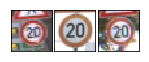

Class 1: Speed limit (30km/h)                               has 1980 samples


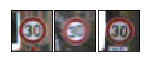

Class 2: Speed limit (50km/h)                               has 2010 samples


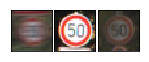

Class 3: Speed limit (60km/h)                               has 1260 samples


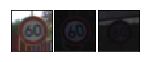

Class 4: Speed limit (70km/h)                               has 1770 samples


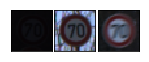

Class 5: Speed limit (80km/h)                               has 1650 samples


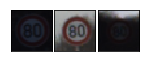

Class 6: End of speed limit (80km/h)                        has 360 samples


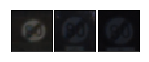

Class 7: Speed limit (100km/h)                              has 1290 samples


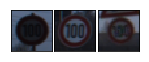

Class 8: Speed limit (120km/h)                              has 1260 samples


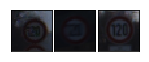

Class 9: No passing                                         has 1320 samples


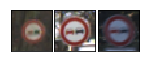

Class 10: No passing for vehicles over 3.5 metric tons       has 1800 samples


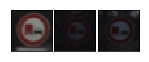

Class 11: Right-of-way at the next intersection              has 1170 samples


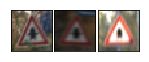

Class 12: Priority road                                      has 1890 samples


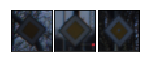

Class 13: Yield                                              has 1920 samples


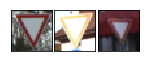

Class 14: Stop                                               has 690 samples


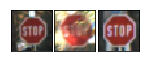

Class 15: No vehicles                                        has 540 samples


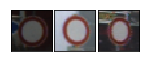

Class 16: Vehicles over 3.5 metric tons prohibited           has 360 samples


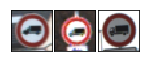

Class 17: No entry                                           has 990 samples


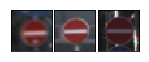

Class 18: General caution                                    has 1080 samples


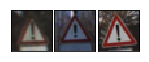

Class 19: Dangerous curve to the left                        has 180 samples


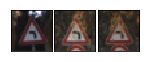

Class 20: Dangerous curve to the right                       has 300 samples


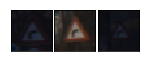

Class 21: Double curve                                       has 270 samples


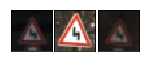

Class 22: Bumpy road                                         has 330 samples


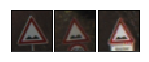

Class 23: Slippery road                                      has 450 samples


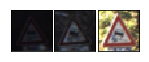

Class 24: Road narrows on the right                          has 240 samples


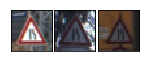

Class 25: Road work                                          has 1350 samples


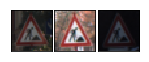

Class 26: Traffic signals                                    has 540 samples


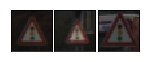

Class 27: Pedestrians                                        has 210 samples


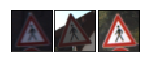

Class 28: Children crossing                                  has 480 samples


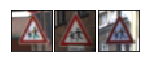

Class 29: Bicycles crossing                                  has 240 samples


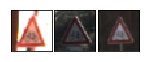

Class 30: Beware of ice/snow                                 has 390 samples


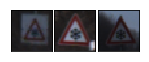

Class 31: Wild animals crossing                              has 690 samples


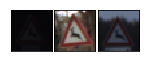

Class 32: End of all speed and passing limits                has 210 samples


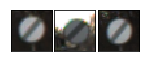

Class 33: Turn right ahead                                   has 599 samples


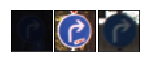

Class 34: Turn left ahead                                    has 360 samples


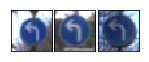

Class 35: Ahead only                                         has 1080 samples


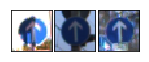

Class 36: Go straight or right                               has 330 samples


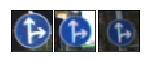

Class 37: Go straight or left                                has 180 samples


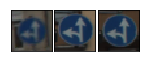

Class 38: Keep right                                         has 1860 samples


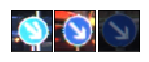

Class 39: Keep left                                          has 270 samples


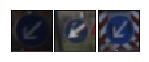

Class 40: Roundabout mandatory                               has 300 samples


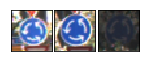

Class 41: End of no passing                                  has 210 samples


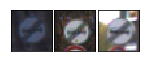

Class 42: End of no passing by vehicles over 3.5 metric tons has 210 samples


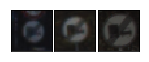

In [21]:
### Data exploration visualization code goes here.
import random

bin_w = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s has %s samples" % (c, bin_w, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 8)
    for i in range(3):
        ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
        ax.imshow(X_train[random_indices[i]])
    pyplot.show()
    

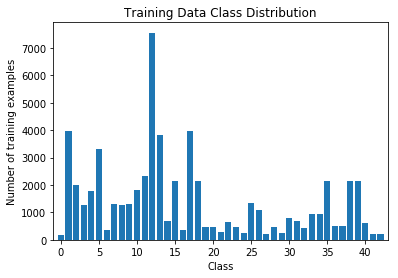

In [30]:
pyplot.bar( np.arange(43), class_counts, align='center')
pyplot.title('Training Data Class Distribution')
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1,43])
pyplot.show()
pyplot.savefig('output_images/training_distribution')

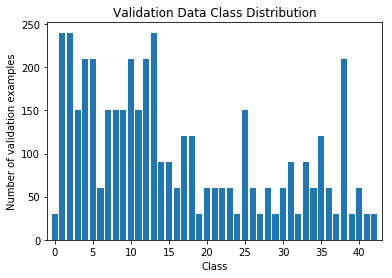

In [31]:
pyplot.bar( np.arange(43), v_class_counts, align='center')
pyplot.title('Validation Data Class Distribution')
pyplot.xlabel('Class')
pyplot.ylabel('Number of validation examples')
pyplot.xlim([-1,43])
pyplot.show()
pyplot.savefig('output_images/validation_distribution')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

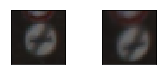

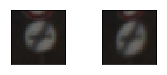

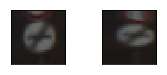

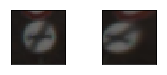

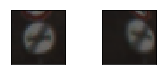

In [28]:
### I'm converting to YUV grayscale, rotating and translating the image a random amount
## Preprocessing with nolearn's lasagne BatchIterator
X_train, y_train = load_pickled_data('traffic-signs-data/train.p', columns=['features', 'labels'])
X_train = X_train / 255.

batch_iterator = AugmentedSignsBatchIterator(batch_size=8, p=1.0, intensity=0.75)
for x_batch, y_batch in batch_iterator(X_train, y_train):
    for i in range(5):
        fig = pyplot.figure(figsize=(3, 1))
        axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        axis.imshow(X_train[i])
        axis = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        axis.imshow(x_batch[i])
        pyplot.savefig('output_images/augmentation_example'+str(i))
        pyplot.show()
    break


In [26]:
### Augment the entire dataset, making extended and balanced sets

from prep import *
import pickle

training_set = "traffic-signs-data/train.p"
balanced_training_set = "traffic-signs-data/train_balanced.p"

# Flip and extend the training set

X_train, y_train = load_pickled_data('traffic-signs-data/train.p', columns=['features', 'labels'])
print('\n# training examples before augmentation = ', X_train.shape[0])
_, class_counts = np.unique(y_train, return_counts=True)

X_train, y_train = flip_extend(X_train, y_train)
print('\n# training examples after flipping = ', X_train.shape[0])

X_bal, y_bal = extend_balancing_classes(X_train, y_train, aug_intensity=0.75)
print('\n# training examples after balancing = ', X_bal.shape[0])

pickle.dump({'features' : X_bal, 'labels' : y_bal}, open(balanced_training_set, 'wb'))
print ('Balanced training dataset saved in', balanced_training_set)


# training examples before augmentation =  34799

# training examples after flipping =  59788
Extending dataset using augmented data (intensity = 0.75)
 |▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮| 100%

# training examples after balancing =  325080
Balanced training dataset saved in traffic-signs-data/train_balanced.p


In [27]:
## Do the same thing for the validation set

from prep import *
import pickle

validation_set = "traffic-signs-data/valid.p"
balanced_validation_set = "traffic-signs-data/valid_balanced.p"

X_val, y_val = load_pickled_data('traffic-signs-data/valid.p', columns=['features', 'labels'])
print('\n# validation examples before augmentation = ', X_val.shape[0])
_, class_counts = np.unique(y_train, return_counts=True)

X_val, y_val = flip_extend(X_val, y_val)
print('\n# validation examples after flipping = ', X_val.shape[0])

X_bal, y_bal = extend_balancing_classes(X_val, y_val, aug_intensity=0.75)#, counts=np.full(43, 20000, dtype=int))
print('\n# validation examples after balancing = ', X_bal.shape[0])

pickle.dump({'features' : X_bal, 'labels' : y_bal}, open(balanced_validation_set, 'wb'))
print ('Balanced validation dataset saved in', balanced_validation_set)


# validation examples before augmentation =  4410

# validation examples after flipping =  7590
Extending dataset using augmented data (intensity = 0.75)
 |▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮| 100%

# validation examples after balancing =  36120
Balanced validation dataset saved in traffic-signs-data/valid_balanced.p


In [ ]:
### Preprocess the files
import pickle
from prep import *

balanced_training_set = "traffic-signs-data/train_balanced.p"
prepped_training_set = "traffic-signs-data/train_prepped.p"

X_train, y_train = load_and_process_data(balanced_training_set)
pickle.dump({
    'features' : X_train,
    'labels' : y_train
}, open(prepped_training_set, 'wb'))
print('preprocessed training data saved in ', prepped_training_set)

In [ ]:
balanced_validation_set = "traffic-signs-data/valid_balanced.p"
prepped_validation_set = "traffic-signs-data/valid_prepped.p"

X_val, y_val = load_and_process_data(balanced_validation_set)
pickle.dump({
    'features' : X_val,
    'labels' : y_val
}, open(prepped_validation_set, 'wb'))
print('preprocessed validation data saved in ', prepped_validation_set)

In [ ]:
testing_set = "traffic-signs-data/test.p"
prepped_testing_set = "traffic-signs-data/test_prepped.p"

X_test, y_test = load_and_process_data(testing_set)
pickle.dump({
    'features' : X_test,
    'labels' : y_test
}, open(prepped_testing_set, 'wb'))
print('preprocessed testing data saved in ', prepped_testing_set)

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# See model.py for model creation

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from model import *
from prep import *
import pickle

X_train, y_train = load_and_process_data("traffic-signs-data/train.p")
pickle.dump({
    'features' : X_train,
    'labels' : y_train
}, open("traffic-signs-data/train_fin.p", 'wb'))

X_valid, y_valid = load_and_process_data("traffic-signs-data/valid.p")
pickle.dump({
    'features' : X_valid,
    'labels' : y_valid
}, open("traffic-signs-data/valid_fin.p", 'wb'))

X_test, y_test = load_and_process_data("traffic-signs-data/test.p")
pickle.dump({
    'features' : X_test,
    'labels' : y_test
}, open("traffic-signs-data/test_fin.p", 'wb'))

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


_____________DATA________________
  Training set: 34799 examples
Validation set: 4410 examples
   Testing set: 12630 examples
    Batch size: 256
_____________MODEL_______________
__________ARCHITECTURE___________
            Type       Size     Dropout (keep p)
 Layer 1    5x5 Conv   32       1.0            
 Layer 2    5x5 Conv   64       1.0            
 Layer 3    5x5 Conv   128      1.0            
 Layer 4    FC         1024     0.5            
___________PARAMETERS____________
Learning rate decay: Disabled (rate = 0.001)
  L2 Regularization: Enabled (lambda = 0.001)
     Early stopping: Enabled (patience = 5)
   Resume old model: Disabled
____________TRAINING______________
Timestamp:2017/02/20 19:06:21
____________EPOCH    0/10______________
     Train loss: 0.59686536, accuracy: 88.01%
Validation loss: 0.74670106, accuracy: 81.95%
      Best loss: inf, accuracy: 0.00%
   Elapsed time: 00:00:44
      Timestamp: 2017/02/20 19:07:00
____________EPOCH    1/10______________
     Tra

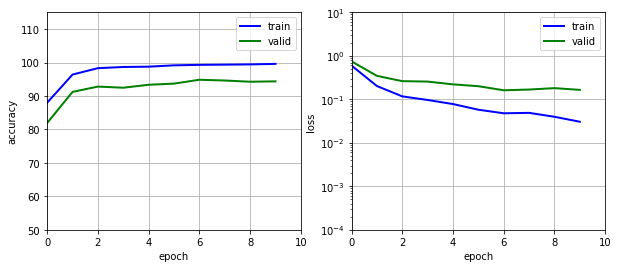

In [1]:
from model import *
from prep import *

training_set = "traffic-signs-data/train_fin.p"
validation_set = 'traffic-signs-data/valid_fin.p'
testing_set = 'traffic-signs-data/test_fin.p'

X_valid, y_valid = load_pickled_data(validation_set, columns=['features', 'labels'])
X_test,  y_test  = load_pickled_data(testing_set,    columns=['features', 'labels'])
X_train, y_train = load_pickled_data(training_set,   columns=['features', 'labels'])

from utils  import Parameters
parameters = Parameters(
    num_classes = 43,
    image_size = (32, 32),
    batch_size = 256,
    max_epochs = 10,
    log_epoch = 1,
    print_epoch = 1,
    learning_rate_decay = False,
    learning_rate = 0.001,
    l2_reg_enabled = True,
    l2_lambda = 0.001,
    early_stopping_enabled = True,
    early_stopping_patience = 5,
    resume_training = False,
    conv1_k = 5,
    conv1_d = 32,
    conv1_p = 1.0,
    conv2_k = 5,
    conv2_d = 64,
    conv2_p = 1.0,
    conv3_k = 5,
    conv3_d = 128,
    conv3_p = 1.0,
    fc4_size = 1024,
    fc4_p = 0.5
)

train_model(parameters, X_train, y_train, X_valid, y_valid, X_test, y_test)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

1. File: (test_images/speed30.png) Dimensions: (32, 32, 4) Type: <class 'numpy.float32'>


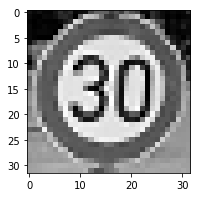

2. File: (test_images/pedestrians.png) Dimensions: (32, 32, 4) Type: <class 'numpy.float32'>


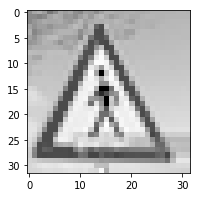

3. File: (test_images/ahead.png) Dimensions: (32, 32, 3) Type: <class 'numpy.float32'>


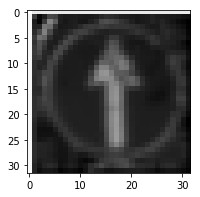

4. File: (test_images/noentry.png) Dimensions: (32, 32, 4) Type: <class 'numpy.float32'>


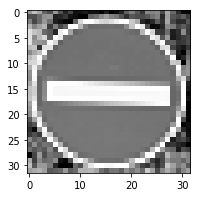

5. File: (test_images/speed50.png) Dimensions: (32, 32, 4) Type: <class 'numpy.float32'>


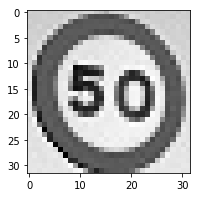

6. File: (test_images/rightturn.png) Dimensions: (32, 32, 4) Type: <class 'numpy.float32'>


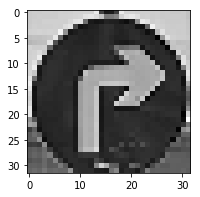

7. File: (test_images/roadwork.png) Dimensions: (32, 32, 4) Type: <class 'numpy.float32'>


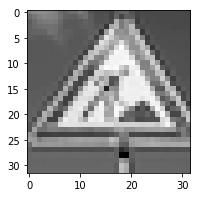

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
from skimage import io
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob('test_images/*')

for ix, image in enumerate(images):
    img = plt.imread(image)
    print(str(ix+1)+'. File: ('+str(image)+') Dimensions: '+str(img.shape) + ' Type: ' + str(type(img[0, 0, 0])))
    img = 0.299* img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    img = (img/255.).astype(np.float32)
    fig = plt.figure(figsize=(3,3))
    #plt.imshow(X.reshape(X.shape[0], X.shape[1]), cmap=plt.cm.Greys)
    plt.imshow(img, cmap='gray')
    plt.savefig('output_images/grayscaled_'+image[12:])
    plt.show()


### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from utils  import *
from prep import *
from model import *

def get_top_kek(params, X, k=5):
    with tf.device('/cpu:0'):
        #avoid an OOM error on AWS 4GB limit GPU
        paths = Paths(params)
        graph = tf.Graph()
        with graph.as_default():
            # Input data. For the training data, we use a placeholder that will be fed at run time with a training minibatch.
            tf_x = tf.placeholder(tf.float32, shape = (None, params.image_size[0], params.image_size[1], 1))
            is_training = tf.constant(False)
            
            with tf.variable_scope(paths.var_scope):
                predictions = tf.nn.softmax(cpu_model_pass(tf_x, params, is_training))
                top_k_predictions = tf.nn.top_k(predictions, k)
                
        with tf.Session(graph = graph) as session:
            session.run(tf.global_variables_initializer())
            tf.train.Saver().restore(session, paths.model_path)
            [p] = session.run([top_k_predictions], feed_dict={
                    tf_x : X
                }
            )
            return np.array(p)


In [14]:
import skimage.io

testing_set = 'traffic-signs-data/test_fin.p'
X_test, y_test = load_pickled_data(testing_set, columns = ['features', 'labels'])

parameters = Parameters(
    num_classes = 43,
    image_size = (32, 32),
    batch_size = 128,
    max_epochs = 10,
    log_epoch = 1,
    print_epoch = 1,
    learning_rate_decay = False,
    learning_rate = 0.001,
    l2_reg_enabled = True,
    l2_lambda = 0.001,
    early_stopping_enabled = True,
    early_stopping_patience = 5,
    resume_training = True,
    conv1_k = 5,
    conv1_d = 32,
    conv1_p = 1.0,
    conv2_k = 5,
    conv2_d = 64,
    conv2_p = 1.0,
    conv3_k = 5,
    conv3_d = 128,
    conv3_p = 1.0,
    fc4_size = 1024,
    fc4_p = 0.5
)
images = glob.glob('test_images/*')
X_new = np.empty([0, 32, 32, 3], dtype = np.float32)
print (X_new.dtype)
print (len(X_new))

for ix, image in enumerate(images):
    img = plt.imread(image)
    X_new = np.append(X_new, [img[:,:,:3]], axis = 0 )

X_eval, _ = preprocess_dataset(X_new)

print (X_eval.shape)
print (X_new.shape)

float32
0
Preprocessing dataset with 7 examples:
 |▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮| 100%
(7, 32, 32, 1)
(7, 32, 32, 3)


In [15]:
predictions = get_top_kek(parameters, X_eval)
print(str(predictions.shape))

(2, 7, 5)


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import matplotlib.gridspec as gridspec

def plot_image_statistics(predictions, preprocessed, original, index):
    # Prepare the grid
    pyplot.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    pyplot.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    pyplot.imshow(original)
    pyplot.axis('off')

    # Plot preprocessed image
    pyplot.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    pyplot.imshow(preprocessed.reshape(32, 32), cmap='gray')
    pyplot.axis('off')

    # Plot predictions
    pyplot.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    pyplot.barh(np.arange(5)+.5, predictions[0][index], align='center')
    pyplot.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    pyplot.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    pyplot.show()


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For image 1, base truth is Speed limit (30 km/hr)


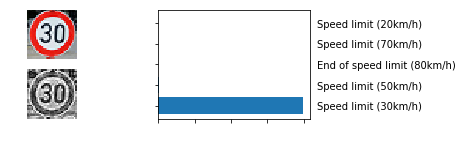

For image 2, base truth is Pedestrians


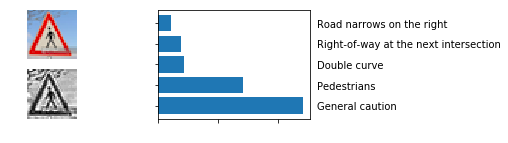

For image 3, base truth is Ahead only


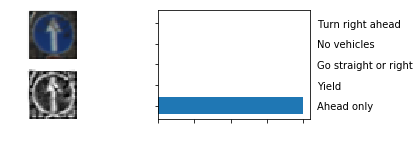

For image 4, base truth is No entry


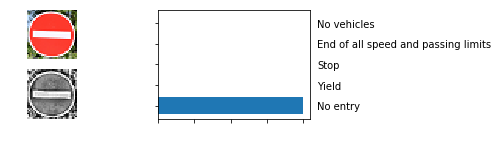

For image 5, base truth is Speed limit (50 km/hr)


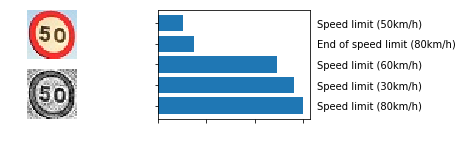

For image 6, base truth is Turn right ahead


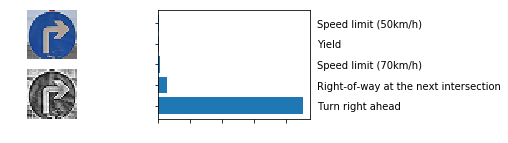

For image 7, base truth is Road work


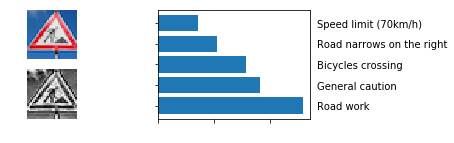

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
signs = [
    'Speed limit (30 km/hr)',
    'Pedestrians',
    'Ahead only',
    'No entry',
    'Speed limit (50 km/hr)',
    'Turn right ahead',
    'Road work',
]
for i in range(7):
    print('For image '+str(i+1)+', base truth is '+str(signs[i]))
    plot_image_statistics(predictions, X_eval[i], X_new[i], i)

### Conclusion

Looks like my model earned a perfect 5/7!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

The writeup can be found in writeup_final.md.